### Set up environment

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
#     precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]     

labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (Hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)')]

### UKCP18 30 minutes

In [10]:
resolution = '2.2km_bng_masked'
ukcp18_30m_2001_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')
resolution = '2.2km_bng_regridded_12km_masked'
ukcp18_30m_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')

In [50]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
ukcp18_30m_2001_2019_GB_jja_12km_results_top80  = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_12km, bins_i_want)
ukcp18_30m_2001_2019_GB_jja_2km_results_top80  = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_2km, bins_i_want)

Text(0.5, 0, 'Intensity (mm/hr))')

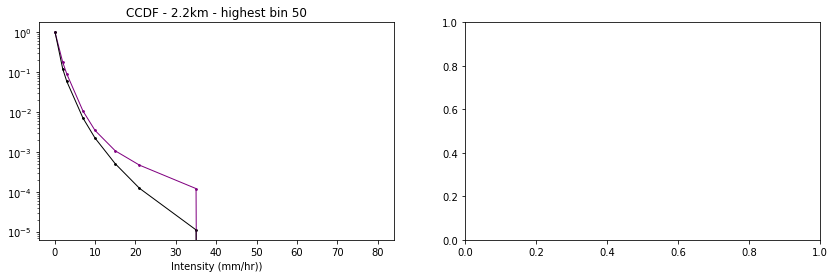

In [15]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

results = [ukcp18_30m_2001_2019_GB_jja_12km_results_top80, cehgear_1990_2014_GB_jja_2km_results_top80]
colors = ['purple', 'black']
plot_ccdf(axs[0],results, colors)
axs[0].set_yscale('log')
axs[0].set_title('CCDF - 2.2km - highest bin 50')
axs[0].set_xlabel('Intensity (mm/hr))')

### UKCP18 hourly

In [21]:
resolution = '2.2km_bng_masked'
ukcp18_hrly_2001_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_jja.npy')
resolution = '2.2km_bng_regridded_12km_masked'
ukcp18_hrly_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_jja.npy')

In [49]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
ukcp18_hrly_2001_2019_GB_jja_12km_results_top80  = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_12km, bins_i_want)
ukcp18_hrly_2001_2019_GB_jja_2km_results_top80  = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_2km, bins_i_want)

Text(0.5, 0, 'Intensity (mm/hr))')

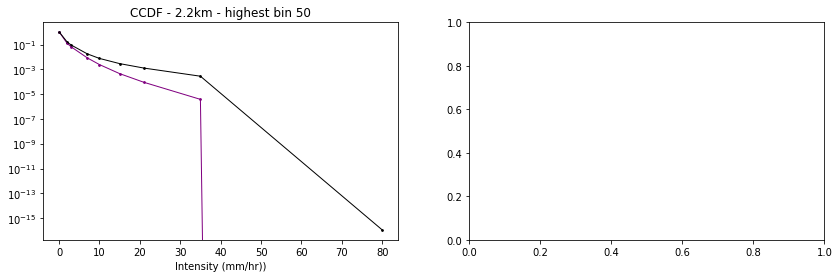

In [23]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

results = [ukcp18_hrly_2001_2019_GB_jja_12km_results_top80, ukcp18_hrly_2001_2019_GB_jja_2km_results_top80]
colors = ['purple', 'black']
plot_ccdf(axs[0],results, colors)
axs[0].set_yscale('log')
axs[0].set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
axs[0].set_xlabel('Intensity (mm/hr))')

### NIMROD

In [16]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_2006_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')
resolution = "NIMROD_regridded_12km"
NIMROD_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')

In [48]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
NIMROD_2006_2019_jja_GB_2km_results_top80  = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_2km, bins_i_want)
# cehgear_1990_2014_GB_jja_1km_results_top80  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_1km, bins_i_want)
NIMROD_2006_2019_jja_GB_12km_results_top80  = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_12km, bins_i_want)

Text(0.5, 0, 'Intensity (mm/hr))')

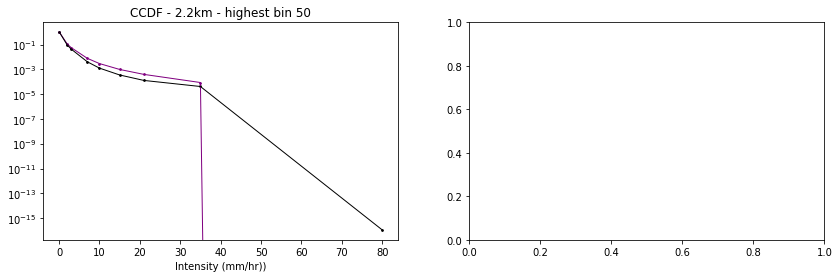

In [17]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

results = [NIMROD_2006_2019_jja_GB_2km_results_top80, NIMROD_2006_2019_jja_GB_12km_results_top80]
colors = ['purple', 'black']
plot_ccdf(axs[0],results, colors)
axs[0].set_yscale('log')
axs[0].set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
axs[0].set_xlabel('Intensity (mm/hr))')

### CEH-GEAR

In [ ]:
resolution = '2.2km_regridded'
cehgear_1990_2014_GB_jja_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')
resolution = '12km_regridded'
cehgear_1990_2014_GB_jja_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')

In [47]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
cehgear_1990_2014_GB_jja_12km_results_top80  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_12km, bins_i_want)
cehgear_1990_2014_GB_jja_2km_results_top80  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_2km, bins_i_want)

Text(0.5, 0, 'Intensity (mm/hr))')

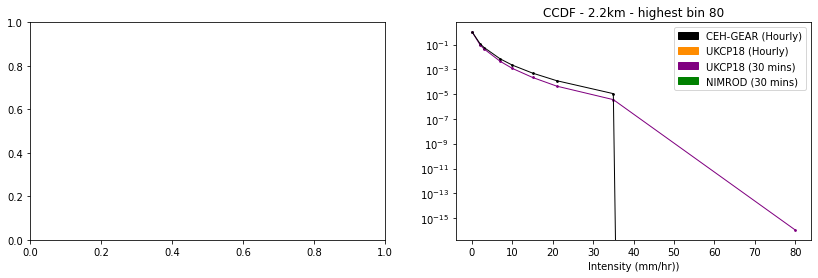

In [30]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))
results = [cehgear_1990_2014_GB_jja_12km_results_top80, cehgear_1990_2014_GB_jja_2km_results_top80]
plot_ccdf(axs[1],results, colors)
axs[1].set_yscale('log')
axs[1].set_title('CCDF - 2.2km - highest bin 80')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs[1].legend(handles=patches);
axs[1].set_xlabel('Intensity (mm/hr))')

## All

In [42]:
def plot_ccdf(axs,results,colors,linestyles):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 2, linestyle=linestyles[num], color = colors[num])

Text(0.5, 0, 'Intensity (mm/hr))')

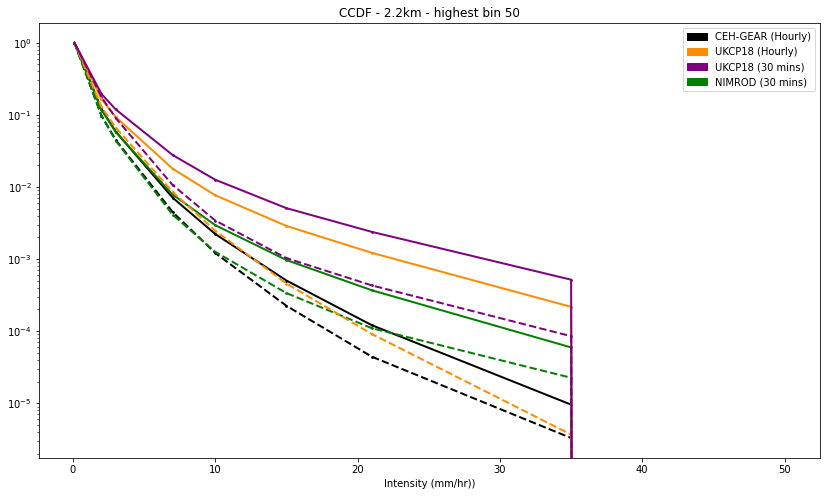

In [53]:
fig, ax = plt.subplots(figsize=(14,8))

# patches = create_patches(['black', 'purple', 'darkorange', 'green'])

results = [cehgear_1990_2014_GB_jja_12km_results_top80, cehgear_1990_2014_GB_jja_2km_results_top80]
colors = ['black', 'black']
plot_ccdf(ax,results, colors, ['dashed','solid', ])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 80')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [NIMROD_2006_2019_jja_GB_12km_results_top80, NIMROD_2006_2019_jja_GB_2km_results_top80]
colors = ['green', 'green']
plot_ccdf(ax,results, colors, ['dashed','solid', ])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_hrly_2001_2019_GB_jja_12km_results_top80, ukcp18_hrly_2001_2019_GB_jja_2km_results_top80]
colors = ['darkorange', 'darkorange']
plot_ccdf(ax,results, colors, ['dashed','solid', ])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_30m_2001_2019_GB_jja_12km_results_top80, ukcp18_30m_2001_2019_GB_jja_2km_results_top80]
colors = ['purple', 'purple']
plot_ccdf(ax,results, colors, ['dashed','solid', ])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

Text(0.5, 0, 'Intensity (mm/hr))')

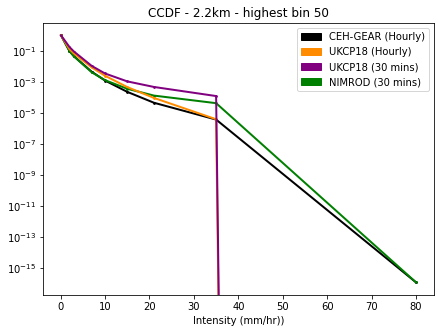

In [45]:
fig, ax = plt.subplots(figsize=(7,5))

# patches = create_patches(['black', 'purple', 'darkorange', 'green'])

results = [cehgear_1990_2014_GB_jja_12km_results_top80]
colors = ['black', 'black']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 80')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [NIMROD_2006_2019_jja_GB_12km_results_top80,]
colors = ['green', 'green']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_hrly_2001_2019_GB_jja_12km_results_top80]
colors = ['darkorange', 'darkorange']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_30m_2001_2019_GB_jja_12km_results_top80]
colors = ['purple', 'purple']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

Text(0.5, 0, 'Intensity (mm/hr))')

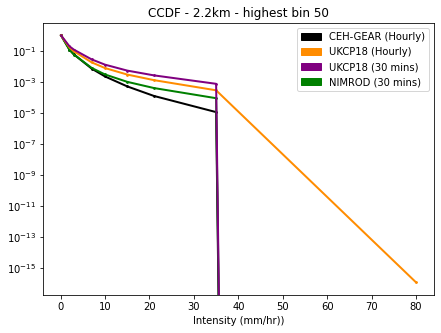

In [46]:
fig, ax = plt.subplots(figsize=(7,5))

# patches = create_patches(['black', 'purple', 'darkorange', 'green'])

results = [cehgear_1990_2014_GB_jja_2km_results_top80]
colors = ['black', 'black']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 80')
ax.legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [NIMROD_2006_2019_jja_GB_2km_results_top80,]
colors = ['green', 'green']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_hrly_2001_2019_GB_jja_2km_results_top80]
colors = ['darkorange', 'darkorange']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')

results = [ukcp18_30m_2001_2019_GB_jja_2km_results_top80]
colors = ['purple', 'purple']
plot_ccdf(ax,results, colors, ['solid', 'dashed'])
ax.set_yscale('log')
ax.set_title('CCDF - 2.2km - highest bin 50')
# axs[0].legend(handles=patches);
ax.set_xlabel('Intensity (mm/hr))')